In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from nn import Model
from nn.layers import Conv2D, MaxPooling2D, Flatten, Dense
from nn.initializers import GlorotNormal, HeNormal
from nn.optimizers import Adam
from tensorflow.keras.datasets import mnist

np.set_printoptions(precision=3)
np.random.seed(1)

In [2]:
(X_train, y_train), _ = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1))
X_train = X_train[:3000] / 255
y_train = y_train[:3000]

In [3]:
glorot = Model()
glorot.add(Conv2D(4, kernel_size=(2, 2), activation='relu', input_shape=(1, 28, 28), weight_initializer=GlorotNormal()))
glorot.add(MaxPooling2D(pool_size=(2, 2)))
glorot.add(Conv2D(4, kernel_size=(2, 2), activation='relu', weight_initializer=GlorotNormal()))
glorot.add(MaxPooling2D(pool_size=(2, 2)))
glorot.add(Conv2D(4, kernel_size=(2, 2), activation='relu', weight_initializer=GlorotNormal()))
glorot.add(MaxPooling2D(pool_size=(2, 2)))
glorot.add(Conv2D(4, kernel_size=(2, 2), activation='relu', weight_initializer=GlorotNormal()))
glorot.add(MaxPooling2D(pool_size=(2, 2)))
glorot.add(Flatten())
glorot.add(Dense(10, 'softmax', weight_initializer=GlorotNormal()))
glorot.compile(Adam(learning_rate=0.01))
glorot.fit(X_train, y_train, epochs=10, batch_size=32, verbose=True)

Epoch 1/10
3000/3000 - loss: 2.1134 - accuracy: 0.2278
Epoch 2/10
3000/3000 - loss: 1.4668 - accuracy: 0.4936
Epoch 3/10
3000/3000 - loss: 1.2154 - accuracy: 0.5799
Epoch 4/10
3000/3000 - loss: 1.0479 - accuracy: 0.6441
Epoch 5/10
3000/3000 - loss: 0.9411 - accuracy: 0.6848
Epoch 6/10
3000/3000 - loss: 0.8693 - accuracy: 0.7097
Epoch 7/10
3000/3000 - loss: 0.8409 - accuracy: 0.7161
Epoch 8/10
3000/3000 - loss: 0.7887 - accuracy: 0.7358
Epoch 9/10
3000/3000 - loss: 0.7501 - accuracy: 0.7488
Epoch 10/10
3000/3000 - loss: 0.7167 - accuracy: 0.7702


In [4]:
he = Model()
he.add(Conv2D(4, kernel_size=(2, 2), activation='relu', input_shape=(1, 28, 28), weight_initializer=HeNormal()))
he.add(MaxPooling2D(pool_size=(2, 2)))
he.add(Conv2D(4, kernel_size=(2, 2), activation='relu', weight_initializer=HeNormal()))
he.add(MaxPooling2D(pool_size=(2, 2)))
he.add(Conv2D(4, kernel_size=(2, 2), activation='relu', weight_initializer=HeNormal()))
he.add(MaxPooling2D(pool_size=(2, 2)))
he.add(Conv2D(4, kernel_size=(2, 2), activation='relu', weight_initializer=HeNormal()))
he.add(MaxPooling2D(pool_size=(2, 2)))
he.add(Flatten())
he.add(Dense(10, 'softmax', weight_initializer=GlorotNormal()))
he.compile(Adam(learning_rate=0.01))
he.fit(X_train, y_train, epochs=10, batch_size=32, verbose=True)

Epoch 1/10
3000/3000 - loss: 2.0810 - accuracy: 0.2488
Epoch 2/10
3000/3000 - loss: 1.1141 - accuracy: 0.6390
Epoch 3/10
3000/3000 - loss: 0.7777 - accuracy: 0.7467
Epoch 4/10
3000/3000 - loss: 0.6414 - accuracy: 0.7876
Epoch 5/10
3000/3000 - loss: 0.5558 - accuracy: 0.8221
Epoch 6/10
3000/3000 - loss: 0.5147 - accuracy: 0.8374
Epoch 7/10
3000/3000 - loss: 0.4708 - accuracy: 0.8514
Epoch 8/10
3000/3000 - loss: 0.4413 - accuracy: 0.8630
Epoch 9/10
3000/3000 - loss: 0.4165 - accuracy: 0.8680
Epoch 10/10
3000/3000 - loss: 0.4016 - accuracy: 0.8754


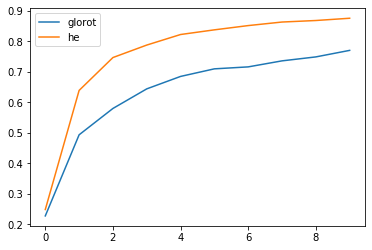

In [5]:
plt.plot(glorot.scores['acc'])
plt.plot(he.scores['acc'])
plt.legend(['glorot', 'he'])
plt.show()